In [2]:
# ============================================
# 📌 STEP 0 – Import Libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [7]:
# ============================================
# 📌 STEP 1 – Load Built-in Dataset
# ============================================
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)
data = housing.frame  # Convert to DataFrame
data.head()



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Shape of dataset: (20640, 9)

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Basic statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHo

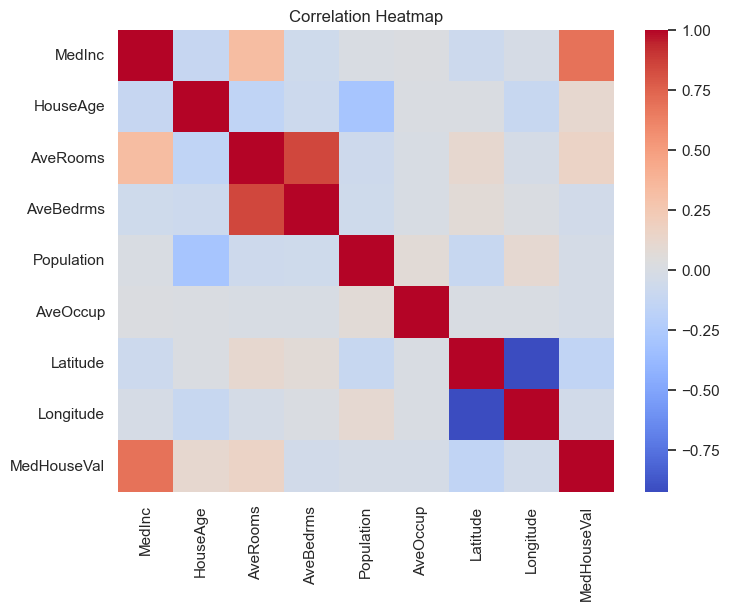

In [12]:
# ============================================
# 📌 STEP 2 – Explore Dataset
# ============================================
print("Shape of dataset:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nBasic statistics:\n", data.describe())

# Check correlations with target
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# ============================================
# 📌 STEP 3 – Split into Features & Target
# ============================================
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 16512
Testing samples: 4128


In [13]:
# ============================================
# 📌 STEP 4 – Train Model
# ============================================
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Model trained successfully!
Intercept: -37.02327770606416
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [14]:
# ============================================
# 📌 STEP 5 – Make Predictions
# ============================================
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()


,Actual,Predicted
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657


In [15]:
# ============================================
# 📌 STEP 6 – Evaluate Model
# ============================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764
R² Score: 0.5757877060324508


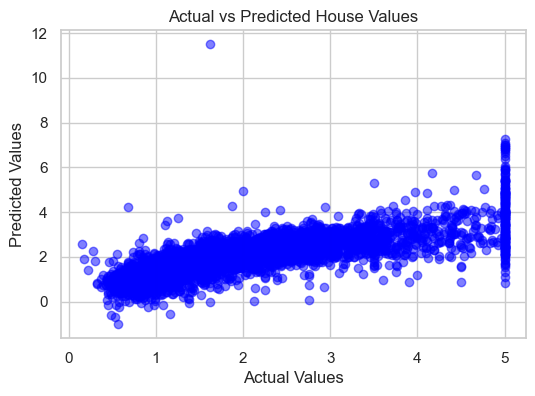

In [16]:
# ============================================
# 📌 STEP 7 – Visualization of Predictions
# ============================================
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Values")
plt.show()
